<a href="https://colab.research.google.com/github/alanbseo/MFAworkshop/blob/main/MFA_1_DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data reading


This builidng MFA analysis requires data and software packages. Please refer to this section for package dependency.

 

In [1]:
# Mount Gdrive 
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive


In [9]:
# list the files in the gdrive
!ls '/content/gdrive/MyDrive/Net zero built environment/MFA workshop' # modify the path as shown in your Gdrive folder list

Data


In [14]:
# set working directory
default_path = '/content/gdrive/MyDrive/Net zero built environment/MFA workshop'

import os
os.chdir(default_path)
# verification
print(os.getcwd())          #print the current working directory 


/content/gdrive/.shortcut-targets-by-id/1gDT-7hKMl37JnTVecJLmI9yB2rUI7rAo/Net zero built environment/MFA workshop


In [44]:
# import packages
import matplotlib.pyplot as plt


In [16]:
# try to import geopandas package (https://geopandas.org/en/stable/)
import geopandas as gpd


ModuleNotFoundError: ignored

In [17]:
# Install the package
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.9 MB/s eta 0:00:00


In [25]:
os.listdir('Data/Data_100m/Jongno-gu')

['(B100)국토통계_건축물-건축물 수 합계 통계-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-개별주택가격-(격자) 100M_서울특별시 종로구_202206',
 '(B100)국토통계_건축물-시기별 건축물 수(35년 이상)-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-연면적-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-용적율-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-주거용도면적-(격자) 100M_서울특별시 종로구_202206',
 '(B100)국토통계_건축물-지상층수-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-지하층수-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_공시지가-공시지가-(격자) 100M_서울특별시 종로구_202207',
 '(B100)국토통계_건축물-건축면적-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-건폐율-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-구조코드-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-높이-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-대지면적-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-사용승인일-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-시기별 건축물 수( 9년 이하)-(격자) 100M_서울특별시 종로구_202303']

In [31]:
import geopandas as gpd

# Read the shapefile
# Built-up area data for Jongno-gu (Feb 2023)
path_data_area = "Data/Data_100m/Jongno-gu/(B100)국토통계_건축물-건축면적-(격자) 100M_서울특별시 종로구_202303/nlsp_021002008.shp"

area_gdf = gpd.read_file(path_data_area)

# Print the first few rows of the GeoDataFrame
print(area_gdf.head()) # Encoding error



            gid     lbl     val  \
0  ë¤ì¬551532   56.31   56.31   
1  ë¤ì¬564526  170.89  170.89   
2  ë¤ì¬539568  702.56  702.56   
3  ë¤ì¬526570  184.17  184.17   
4  ë¤ì¬548528  270.14  270.14   

                                            geometry  
0  POLYGON ((955100.000 1953200.000, 955100.000 1...  
1  POLYGON ((956400.000 1952600.000, 956400.000 1...  
2  POLYGON ((953900.000 1956800.000, 953900.000 1...  
3  POLYGON ((952600.000 1957000.000, 952600.000 1...  
4  POLYGON ((954800.000 1952800.000, 954800.000 1...  


In [39]:
# Hangul encoded in UTF-8
builtuparea_gdf = gpd.read_file(path_data_area, encoding = "UTF-8")

print(builtuparea_gdf.head()) # now Grid ID looks good

        gid     lbl     val                                           geometry
0  다사551532   56.31   56.31  POLYGON ((955100.000 1953200.000, 955100.000 1...
1  다사564526  170.89  170.89  POLYGON ((956400.000 1952600.000, 956400.000 1...
2  다사539568  702.56  702.56  POLYGON ((953900.000 1956800.000, 953900.000 1...
3  다사526570  184.17  184.17  POLYGON ((952600.000 1957000.000, 952600.000 1...
4  다사548528  270.14  270.14  POLYGON ((954800.000 1952800.000, 954800.000 1...


In [61]:
# read other files
path_data_height = "Data/Data_100m/Jongno-gu/(B100)국토통계_건축물-높이-(격자) 100M_서울특별시 종로구_202303/nlsp_021002013.shp"
height_gdf = gpd.read_file(path_data_height, encoding = "UTF-8")
print(height_gdf.head())  

path_data_code = "Data/Data_100m/Jongno-gu/(B100)국토통계_건축물-구조코드-(격자) 100M_서울특별시 종로구_202303/nlsp_021002004.shp"
code_gdf = gpd.read_file(path_data_code, encoding = "UTF-8")
print(code_gdf.head())  

        gid    lbl    val                                           geometry
0  다사551532   7.31   7.31  POLYGON ((955100.000 1953200.000, 955100.000 1...
1  다사564526  19.32  19.32  POLYGON ((956400.000 1952600.000, 956400.000 1...
2  다사539568  14.19  14.19  POLYGON ((953900.000 1956800.000, 953900.000 1...
3  다사526570   7.31   7.31  POLYGON ((952600.000 1957000.000, 952600.000 1...
4  다사548528  21.25  21.25  POLYGON ((954800.000 1952800.000, 954800.000 1...
        gid lbl    val                                           geometry
0  다사516573  11  100.0  POLYGON ((951600.000 1957300.000, 951600.000 1...
1  다사517558  11  100.0  POLYGON ((951700.000 1955800.000, 951700.000 1...
2  다사517559  11  100.0  POLYGON ((951700.000 1955900.000, 951700.000 1...
3  다사517560  11  100.0  POLYGON ((951700.000 1956000.000, 951700.000 1...
4  다사517564  21  100.0  POLYGON ((951700.000 1956400.000, 951700.000 1...


In [43]:
print(builtuparea_gdf.columns)
print(height_gdf.columns)
print(code_gdf.columns) # take 'lbl' only. not sure what 'val' means here. 

Index(['gid', 'lbl', 'val', 'geometry'], dtype='object')
Index(['gid', 'lbl', 'val', 'geometry'], dtype='object')
Index(['gid', 'lbl', 'val', 'geometry'], dtype='object')


<Axes: >

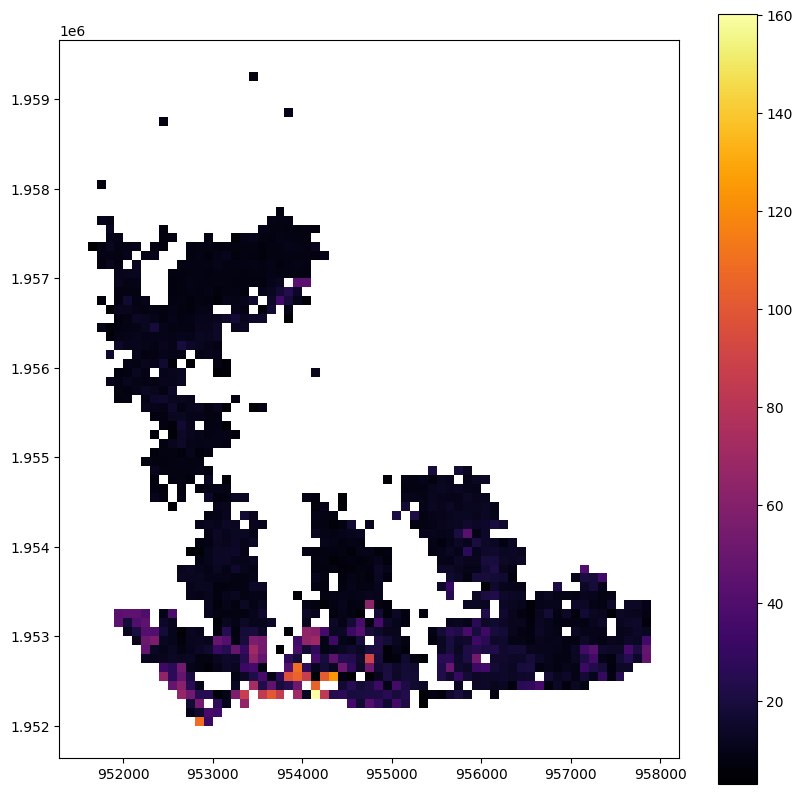

In [53]:
f,ax=plt.subplots(nrows = 1, ncols = 1,figsize=(10,10)) # create the ax object 
height_gdf.plot(column='val', cmap='inferno',alpha=1,legend=True, ax= ax)

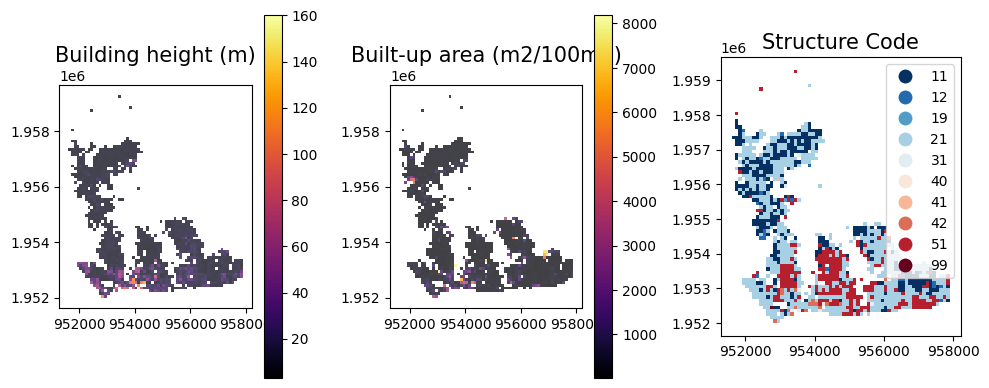

In [93]:
# do a little more plotting
f,ax=plt.subplots(nrows = 1, ncols = 3,figsize=(10,4))


height_gdf.plot(column='val',cmap='inferno', alpha=0.75,legend=True,ax=ax[0])
builtuparea_gdf.plot(column='val',cmap='inferno',alpha=0.75,legend=True,ax=ax[1])
code_gdf.plot(column='lbl', cmap='RdBu_r',categorical=True, alpha=1,legend=True,ax=ax[2])
ax[0].set_title('Building height (m)',fontsize=15)
ax[1].set_title('Built-up area (m2/100m2)',fontsize=15)
ax[2].set_title('Structure Code',fontsize=15)
plt.tight_layout()


# can save the figure

if not os.path.exists('images'): 
   os.mkdir('images') # create a folder for output images

plt.savefig('images/Builtup_Jongno-gu.png',dpi=300)

os.listdir('images')

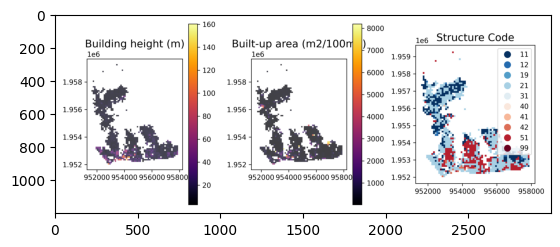

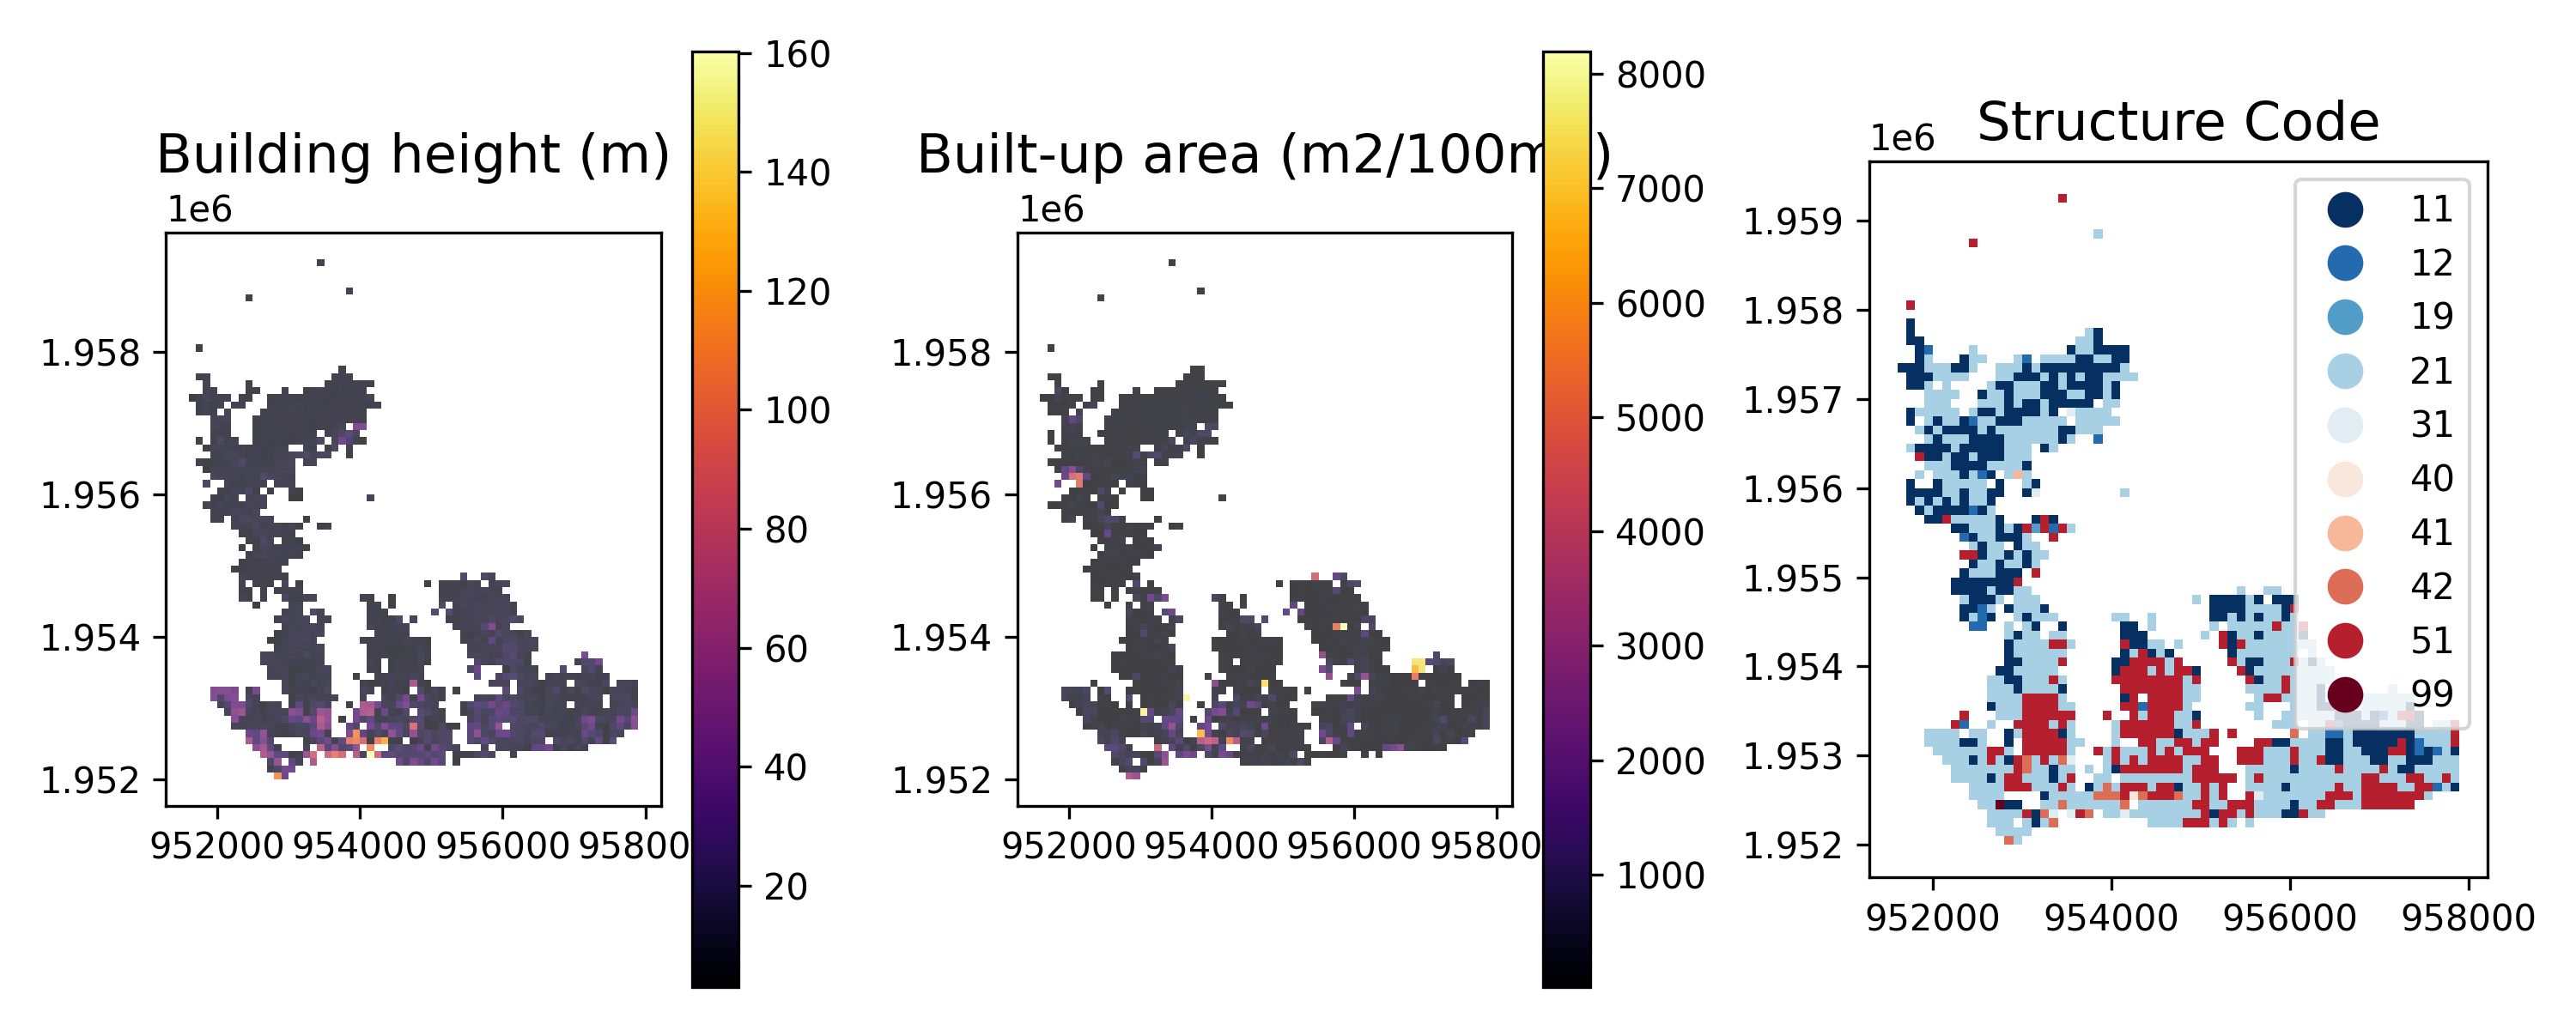

In [94]:
# both work
import matplotlib.image as mpimg
img = mpimg.imread('images/Builtup_Jongno-gu.png')
imgplot = plt.imshow(img)
plt.show()

from PIL import Image
image = Image.open('images/Builtup_Jongno-gu.png')
image.show()

### 2. Data pre-processing

The original data are stored in vector GIS format. For the further analysis, we want to rasterise them into the default grid (100 m x 100 m).

In [ ]:
# install the required package
!pip install rasterio

In [109]:
# import rasterio
from rasterio import transform
import rasterio
from rasterio import features


# Create a base 100 m grid 
dummy_shp = builtuparea_gdf
bbox = dummy_shp.total_bounds
xmin, ymin, xmax, ymax = bbox
res = 100 # desired resolution
w = (xmax - xmin) // res 
h = (ymax - ymin) // res

# float type for continuous data
out_meta_float32 = {
    "driver": "GTiff",
    "dtype": "float32",
    "height": h,
    "width": w,
    "count": 1,
    "crs": dummy_shp.crs,
    "transform": transform.from_bounds(xmin, ymin, xmax, ymax, w, h),
    "compress": 'lzw'
}

# unit8 for categorical data
out_meta_uint8 = {
    "driver": "GTiff",
    "dtype": "uint8",
    "height": h,
    "width": w,
    "count": 1,
    "crs": dummy_shp.crs,
    "transform": transform.from_bounds(xmin, ymin, xmax, ymax, w, h),
    "compress": 'lzw'
}

In [112]:
height_out_fn = './images/height_100m.tif'
 
# convert height
with rasterio.open(height_out_fn, 'w+', **out_meta_float32) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(height_gdf.geometry, height_gdf.val))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)

area_out_fn = './images/area_100m.tif'

# convert area
with rasterio.open(area_out_fn, 'w+', **out_meta_float32) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(builtuparea_gdf.geometry, height_gdf.val))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)


 


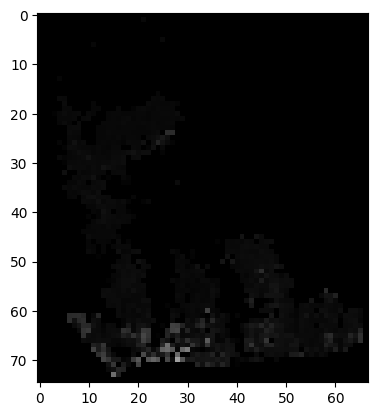

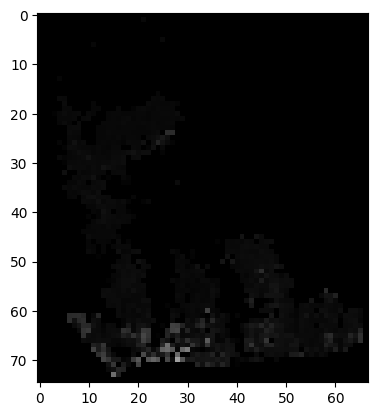

In [114]:
height_100m = mpimg.imread('images/height_100m.tif')
imgplot = plt.imshow(height_100m)
plt.show()


area_100m = mpimg.imread('images/height_100m.tif')
imgplot = plt.imshow(area_100m)
plt.show()



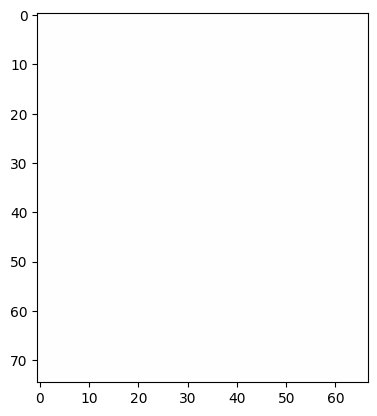

[[[0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]
  ...
  [0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]]

 [[0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]
  ...
  [0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]]

 [[0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]
  ...
  [0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]]

 ...

 [[0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]
  ...
  [0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]]

 [[0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]
  ...
  [0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]]

 [[0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]
  ...
  [0 0 0 1]
  [0 0 0 1]
  [0 0 0 1]]]


In [117]:
volume_100m = height_100m * area_100m

imgplot = plt.imshow(volume_100m)
plt.show()

print(volume_100m)

<AxesSubplot:>

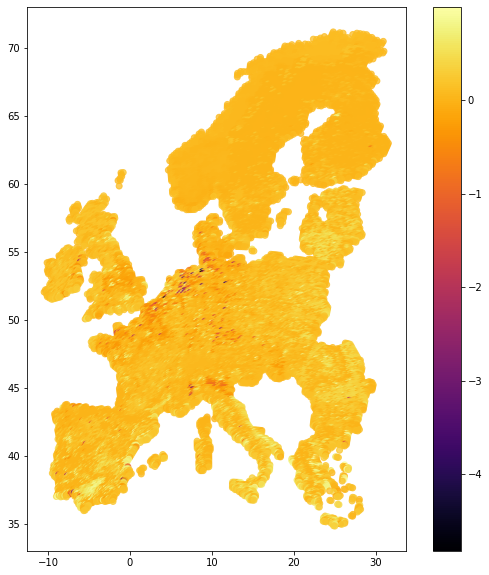

In [ ]:
#f,ax=plt.subplots(1,1,figsize=(10,10))
#db.plot(column='HANPP_LUC_rel',cmap='inferno',alpha=0.75,legend=True,ax=ax) # scheme='percentiles',

In [ ]:
#sns.pairplot(dbplot.drop('error',axis=1),diag_kind  ="hist",\
#             kind='reg',plot_kws={'line_kws':{'color':'black','lw':2}, 'scatter_kws': {'linewidth':0,'alpha': 0.3}})